In [2]:
import h5py
import pandas as pd

list_freq = []

with h5py.File('data/en.hdf5') as f:
	g = f['en-4']		
	for k in g.keys():
		list_freq.append((k, g[k].shape[0]))

df_freq = pd.DataFrame(list_freq)
df_freq.sort_values(by=1, ascending=False, inplace=True)
df_freq[df_freq[1]>1000]

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'data/en.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D


e = 1

embs = np.empty((0,2))
dict_clst = {}

with h5py.File('nn.hdf5') as f:
	g = f['nn-9']		
	
	for i in g['|']:
		i = i.reshape(1, -1)
		embs = np.concatenate((embs, i), axis=0)

dbscan = DBSCAN(eps=e, min_samples=10)
cluster = dbscan.fit_predict(embs)
print(f'clusters:{max(cluster)+1}, noise:{np.sum(cluster == -1)}')
plt.scatter(x=embs[:,0], y=embs[:,1], c=cluster)
plt.show()

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

sw = 'am'

# HDF5 ファイルからデータを読み込み
embs = np.empty((0, 2))

with h5py.File('de.hdf5', 'r') as f:
    g = f['de-2']
    for i in g[sw]:
        i = i.reshape(1, -1)  # (2,) を (1, 2) に変換
        embs = np.concatenate((embs, i), axis=0)

# KDE を計算
kde = gaussian_kde(embs.T)

# グリッドを作成
x_min, x_max = embs[:, 0].min(), embs[:, 0].max()
y_min, y_max = embs[:, 1].min(), embs[:, 1].max()
x_grid = np.linspace(x_min, x_max, 50)
y_grid = np.linspace(y_min, y_max, 50)
X, Y = np.meshgrid(x_grid, y_grid)

# KDE を評価
positions = np.vstack([X.ravel(), Y.ravel()])
Z = kde(positions).reshape(X.shape)

# 3D プロット
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Density')
ax.set_title(f'3D KDE Plot of Embeddings "{sw}"')

plt.show()


In [ ]:
import h5py
import numpy as np
import plotly.graph_objects as go
from scipy.stats import gaussian_kde

sw = '|'

# HDF5 ファイルからデータを読み込み
embs = np.empty((0, 2))

with h5py.File('nn.hdf5', 'r') as f:
    g = f['nn-9']
    for i in g[sw]:
        i = i.reshape(1, -1)  # (2,) を (1, 2) に変換
        embs = np.concatenate((embs, i), axis=0)

# KDE を計算
kde = gaussian_kde(embs.T)

# グリッドを作成
x_min, x_max = embs[:, 0].min(), embs[:, 0].max()
y_min, y_max = embs[:, 1].min(), embs[:, 1].max()
x_grid = np.linspace(x_min, x_max, 50)
y_grid = np.linspace(y_min, y_max, 50)
X, Y = np.meshgrid(x_grid, y_grid)

# KDE を評価
positions = np.vstack([X.ravel(), Y.ravel()])
Z = kde(positions).reshape(X.shape)

# Plotly で 3D KDE をプロット
fig = go.Figure()

fig.add_trace(go.Surface(
    x=X, y=Y, z=Z,
    colorscale='Viridis',
    opacity=0.8
))

# レイアウトの設定
fig.update_layout(
    title=f'3D KDE Plot of "{sw}"',
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="Density"
    )
)

# 表示
fig.show()


In [ ]:
lang = 'nn'
id = 9
top = 0
bottom = 10


import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

list_freq = []

with h5py.File(f'{lang}.hdf5') as f:
	g = f[f'{lang}-{id}']		
	for k in g.keys():
		list_freq.append((k, g[k].shape[0]))

df_freq = pd.DataFrame(list_freq)
df_freq.sort_values(by=1, ascending=False, inplace=True)
subwords = df_freq.iloc[top:bottom,0]

for sw in subwords:
	# HDF5 ファイルからデータを読み込み
	embs = np.empty((0, 2))

	with h5py.File(f'{lang}.hdf5') as f:
		g = f[f'{lang}-{id}']		
		for i in g[sw]:
			i = i.reshape(1, -1)  # (2,) を (1, 2) に変換
			embs = np.concatenate((embs, i), axis=0)

	# KDE を計算
	kde = gaussian_kde(embs.T)

	# グリッドを作成
	x_min, x_max = embs[:, 0].min(), embs[:, 0].max()
	y_min, y_max = embs[:, 1].min(), embs[:, 1].max()
	x_grid = np.linspace(x_min, x_max, 50)
	y_grid = np.linspace(y_min, y_max, 50)
	X, Y = np.meshgrid(x_grid, y_grid)

	# KDE を評価
	positions = np.vstack([X.ravel(), Y.ravel()])
	Z = kde(positions).reshape(X.shape)

	# 3D プロット
	fig = plt.figure(figsize=(6, 4))
	ax = fig.add_subplot(111, projection='3d')

	ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.7)
	ax.set_xlabel('X')
	ax.set_ylabel('Y')
	ax.set_zlabel('Density')
	ax.set_title(f'3D KDE Plot of Embeddings "{sw}"')

	plt.show()


In [ ]:
lang = 'ba'

import h5py
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
from scipy.integrate import simpson

list_H = []

for id in range(1, 11):
	list_freq = []
	list_entropy = []

	with h5py.File(f'data/{lang}.hdf5') as f:
		g = f[f'{lang}-{id}']		
		for k in g.keys():
			list_freq.append((k, g[k].shape[0]))

	df_freq = pd.DataFrame(list_freq)
	df_freq.sort_values(by=1, ascending=False, inplace=True)
	subwords = df_freq[df_freq[1]>1000].iloc[:,0]

	for sw in subwords:
		# HDF5 ファイルからデータを読み込み
		embs = np.empty((0, 2))

		with h5py.File(f'data/{lang}.hdf5') as f:
			g = f[f'{lang}-{id}']		
			for i in g[sw]:
				i = i.reshape(1, -1)  # (2,) を (1, 2) に変換
				embs = np.concatenate((embs, i), axis=0)

		# KDE を計算
		kde = gaussian_kde(embs.T)

		x_grid = np.linspace(embs[:,0].min(), embs[:,0].max(), 100)
		y_grid = np.linspace(embs[:,1].min(), embs[:,1].max(), 100)
		X, Y = np.meshgrid(x_grid, y_grid)
		positions = np.vstack([X.ravel(), Y.ravel()])
		P = kde(positions).reshape(X.shape)  # 2D に変換

		# 🌟 3️⃣ シャノンエントロピーの計算
		dx = x_grid[1] - x_grid[0]  # X 軸の間隔
		dy = y_grid[1] - y_grid[0]  # Y 軸の間隔

		entropy_x = simpson(simpson(P * np.log(P + 1e-10), dx=dx, axis=0), dx=dy, axis=0)
		entropy = -entropy_x * dx * dy  # 積分結果を調整
		list_entropy.append(entropy)

		#print(f'{sw}: {entropy:.4f}')
	list_H.append(np.mean(list_entropy))
	print(f'{lang}-{id}: {np.mean(list_entropy):.4f}')

print(f'{lang}: {np.mean(list_H):.4f}')

In [ ]:
from transformers import BertTokenizer, BertModel
import numpy as np

with open('data/test-the.txt', 'r') as f:
	text = f.readlines()
	text = [t.strip() for t in text]
	text = [t for t in text if 'the' in t]
embeddings = np.empty([0, 768])

model = BertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
encoded = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
subwords = tokenizer.convert_ids_to_tokens(encoded['input_ids'][0][1:-1])
index = [i for i in range(len(subwords)) if subwords[i] == 'the']
output = model(**encoded) 
embed = output.last_hidden_state.squeeze(0)
for i in index:
	embeddings = np.concatenate((embeddings, embed[i].detach().numpy().reshape(1,-1)))

In [ ]:
test = np.random.uniform(lower_bound, upper_bound, size=(768, 10))

In [ ]:
from scipy.stats import gaussian_kde

data = np.random.rand(100,100)
kde = gaussian_kde(data.T)

In [ ]:
test.shape

In [ ]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

sentences = [
    "The sun rises in the east.",
    "She enjoys reading historical novels.",
    "He went to the gym early this morning.",
    "They are planning a trip to Italy next summer.",
    "The cat slept peacefully on the windowsill.",
    "I love drinking coffee in the morning.",
    "We watched a great movie last night.",
    "The teacher explained the concept clearly.",
    "It's going to rain later today.",
    "He plays the guitar really well."
]

encoded = tokenizer(sentences, return_tensors='pt', truncation=True, padding=True)
subwords = [tokenizer.convert_ids_to_tokens(encoded['input_ids'][i]) for i in range(encoded['input_ids'].shape[0])]
output = model(**encoded).last_hidden_state

In [ ]:
import numpy as np
import torch
dict_emb = {}
for s, embs in zip(subwords, output):
	for sw,emb in zip(s, embs):
		emb = emb.unsqueeze(0)
		if sw not in dict_emb:
			dict_emb[sw] = emb
		else:
			dict_emb[sw] = torch.cat((dict_emb[sw], emb), dim=0)

In [ ]:
dict_emb['the']

In [ ]:
from scipy.stats import gaussian_kde

dict_kde = {}
for sw in dict_emb:
	dict_kde[sw] = gaussian_kde(dict_emb[sw].detach().numpy().T)

In [ ]:
import numpy as np
import math

def compute_entropy_from_kde(kde, num_samples=100000, bounds=(-1, 1)):
    dim = kde.dataset.shape[0]  # 次元数（例：768）

    # ステップ1：一様分布からサンプルを生成（評価点）
    lower = np.full(dim, bounds[0])
    upper = np.full(dim, bounds[1])
    samples = np.random.uniform(lower, upper, size=(dim, num_samples))  # shape: (dim, num_samples)

    # ステップ2：確率密度を評価
    probs = kde(samples)  # shape: (num_samples,)

    # ステップ3：数値安定性のために小さい値を加算（log(0)回避）
    epsilon = 1e-12
    log_probs = np.log(probs + epsilon)  # natural log（底e）
    
    # ステップ4：モンテカルロ近似で積分
    entropy_estimates = -probs * log_probs
    volume = np.prod(upper - lower)  # 領域体積（[-1,1]^d）
    entropy = volume * np.mean(entropy_estimates)

    return entropy


In [3]:
from classes import Embedding, Density

with open('test-the.txt', 'r') as f:
	text = f.readlines()
	text = text[:100]
embedding = Embedding('bert-base-cased', 'bert-base-cased', text)
density = Density()

dict_embeddings = embedding.embed()

density.kde(dict_embeddings)
density.entropy()

ValueError: Number of dimensions is greater than number of samples. This results in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Note that `gaussian_kde` interprets each *column* of `dataset` to be a point; consider transposing the input to `dataset`.

In [ ]:
import time
from datetime import datetime
t = datetime.now()

print(f'Analysis completed: {t.strftime("%H:%M:%S")}.\nProcessing time:  seconds.')

Analysis completed: 22:06:46.
 Processing time:  seconds.


In [24]:
print(f'Analysis completed: {t.strftime("%H:%M:S%")}Processing time:  seconds.')

Analysis completed: 21:58:S%Processing time:  seconds.


In [ ]:
import time

t1 = time.time()
time.sleep(1)
t2 = time.time()
break
print(round(t2 - t1, 3))

1.005


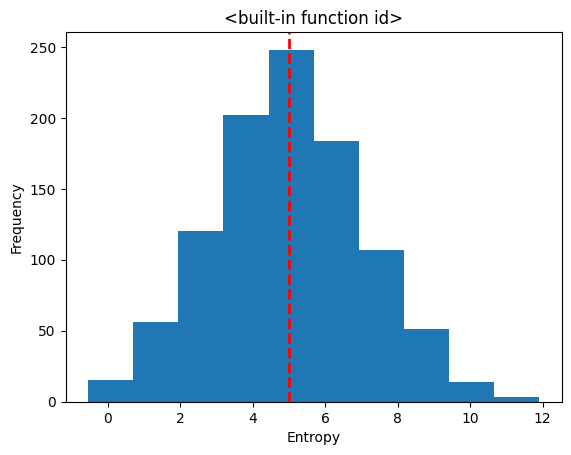

In [38]:
import matplotlib.pyplot as plt
import numpy as np
list_entropy = np.random.normal(loc=5, scale=2, size=1000)
plt.hist(list_entropy, bins=10)
plt.axvline(np.mean(list_entropy), color='red', linestyle='dashed', linewidth=2, label=f"Mean:np.mean({list_entropy})")
plt.title(f'{id}')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.savefig(f'{id}-histogram.png')

In [12]:
for i in range(0,38, 100):
	print(i)

0


In [ ]:
for i,j in zip(range(0,1000,100), range(100,1000,100)):
	print(i,j)

進捗: 1/10進捗: 2/10進捗: 3/10進捗: 4/10進捗: 5/10進捗: 6/10進捗: 7/10進捗: 8/10進捗: 9/10進捗: 10/10


In [32]:
import time
for i in range(11):
	percent = int(i / 10 * 100)
	process = int(percent / 5)
	print(f'\rprocessed: |{"#"*process}{"-"*(20-process)}| {percent}%', end='')
	time.sleep(0.5)

processed: |####################| 100%

In [40]:
info = f'''-----initial settings-----
data source: 
project id: 
data id: 
mode: 
tokenizer: 
model: 
batch: 
sample number: 
--------------------------'''

with open('text.txt', 'w') as f:
	f.write(info)

In [34]:
import numpy as np
np_test = np.array([[1,2,3,4,5], [4,5,6,7,8],[7,8,9,10,11], [10,11,12,13,14]])
np_test

array([[ 1,  2,  3,  4,  5],
       [ 4,  5,  6,  7,  8],
       [ 7,  8,  9, 10, 11],
       [10, 11, 12, 13, 14]])

In [49]:
import time
batch = 20
for i in range(batch, 2000+1, batch):
	percent = int(i / 2000 * 100)
	process = int(percent / 2)
	print(f'\r|{"#"*process}{"-"*(50-process)}|: {percent}%', end='')
	time.sleep(0.1)

|##################################################|: 100%

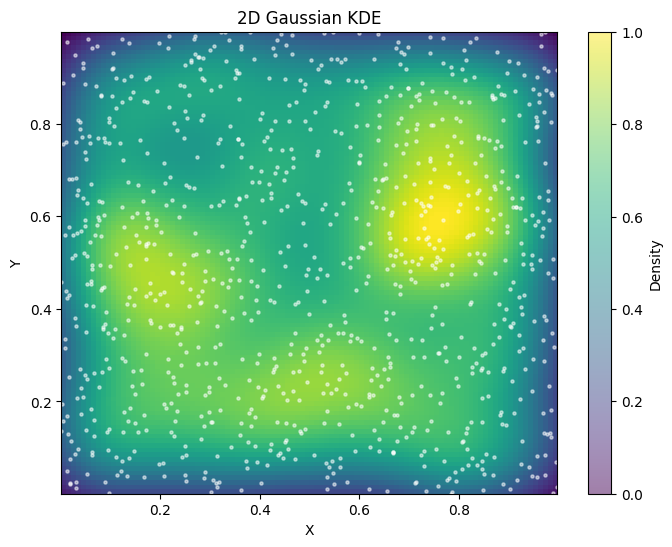

In [63]:
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import numpy as np

embedding = np.random.random((1000,2))

kde = gaussian_kde(embedding.T)
# グリッド作成
x_min, x_max = embedding[:, 0].min(), embedding[:, 0].max()
y_min, y_max = embedding[:, 1].min(), embedding[:, 1].max()

X, Y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
positions = np.vstack([X.ravel(), Y.ravel()])

# KDE 評価
Z = np.reshape(kde(positions), X.shape)

# プロット
plt.figure(figsize=(8, 6))
plt.imshow(Z.T, origin='lower', aspect='auto',
           extent=[x_min, x_max, y_min, y_max], cmap='viridis')
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, c='white', alpha=0.5)
plt.title("2D Gaussian KDE")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(label="Density")
plt.show()

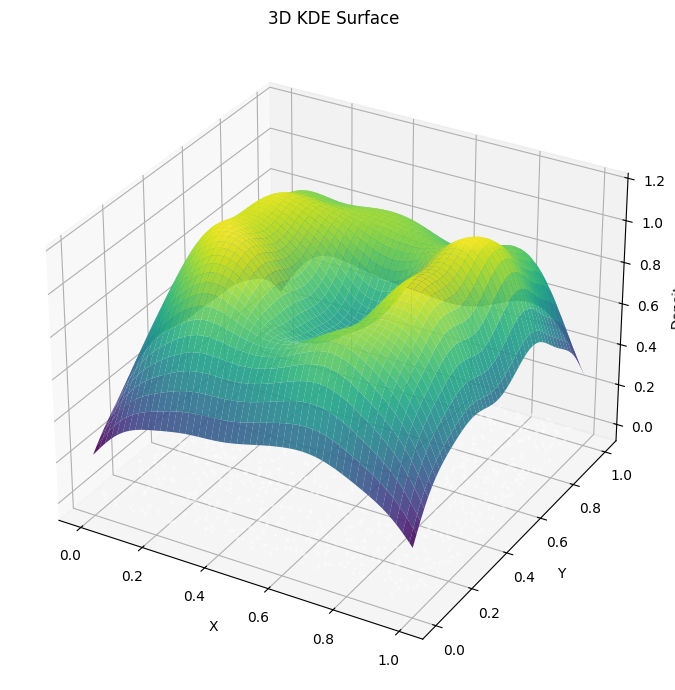

In [69]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ランダムな2次元データ（1000点）
embedding = np.random.random((1000, 2))

# KDEを実行（(2, 1000) の形に）
kde = gaussian_kde(embedding.T)

# グリッド作成
x_min, x_max = embedding[:, 0].min(), embedding[:, 0].max()
y_min, y_max = embedding[:, 1].min(), embedding[:, 1].max()
X, Y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
positions = np.vstack([X.ravel(), Y.ravel()])

# KDE密度評価
Z = kde(positions).reshape(X.shape)

# 3D プロット
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.9)

# オプション：元の点も描画
ax.scatter(embedding[:, 0], embedding[:, 1], np.zeros_like(embedding[:, 0]), 
           c='white', s=3, alpha=0.3)

# ラベル・タイトル
ax.set_title('3D KDE Surface')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Density')

plt.tight_layout()
plt.show()


In [11]:
import numpy as np
from scipy.stats import gaussian_kde
import plotly.graph_objects as go

# ランダムな2次元データ（1000サンプル）
embedding = np.random.gamma((1000,2), scale=1.0, size=None)

# KDE を実行（転置して shape: (2, 1000) に）
kde = gaussian_kde(embedding.T)

# グリッド作成
x_min, x_max = embedding[:, 0].min(), embedding[:, 0].max()
y_min, y_max = embedding[:, 1].min(), embedding[:, 1].max()

x_grid, y_grid = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
positions = np.vstack([x_grid.ravel(), y_grid.ravel()])

# KDE 評価
z_values = kde(positions).reshape(x_grid.shape)

# Plotlyで3Dサーフェス表示
fig = go.Figure(data=[
    go.Surface(z=z_values, x=x_grid, y=y_grid, colorscale='Viridis', showscale=True)
])

# 元の散布図も地面(Z=0)に描写
fig.add_trace(
    go.Scatter3d(
        x=embedding[:, 0],
        y=embedding[:, 1],
        z=np.zeros_like(embedding[:, 0]),
        mode='markers',
        marker=dict(size=2, color='white', opacity=0.5),
        name='Original Points'
    )
)

# レイアウト調整
fig.update_layout(
    title='3D KDE Surface with Original Points',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Density'
    ),
    width=900,
    height=700
)

fig.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [2]:
embedding

array([999.89975482,   2.06083451])